# Clustering algorithms 
In this notebook we will do a quick comparison of the different Hierarchical clustering linkage functions and the DBSCAN algorithm. First some standard imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

We have seen already that an important limitation of kmeans is that it assumes all clusters will be linearly separable. Generate a dataset with two moons, generate 200 examples, with `noise=0.05, random_state=0`. Make a scatter plot to visualize the points.

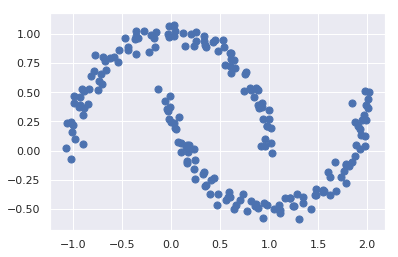

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');

## Hierarchical clustering
Import the object `AgglomerativeClustering` to perform hierarchical clustering on this dataset. Try different linkage functions, what do you observe?

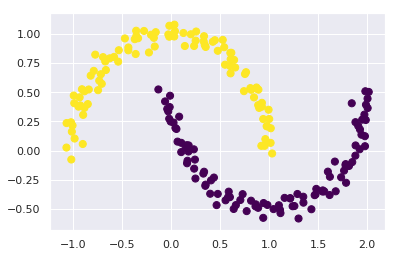

In [3]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='single').fit(X)

labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Now change the noise factor when generating the dataset, try 0.6, 0.8 and 1. What results do you get?

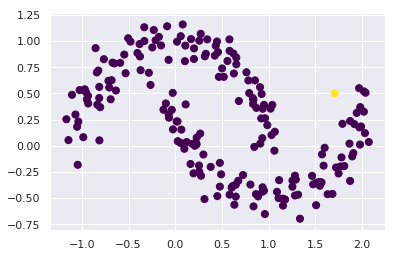

In [4]:
X, y = make_moons(200, noise=.1, random_state=0)

clustering = AgglomerativeClustering(linkage='single').fit(X)

labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## DBSCAN
Repeat the experiments with DBSCAN use `eps=0.3, min_samples=3`

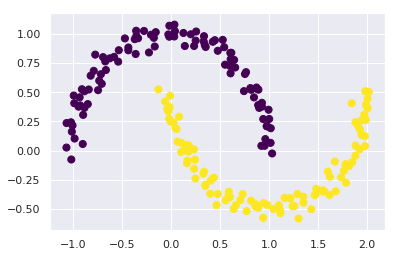

In [5]:
from sklearn.cluster import DBSCAN

X, y = make_moons(200, noise=.05, random_state=0)

clustering = DBSCAN(eps=0.3, min_samples=3).fit(X)
labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

For the case with increased noise, you will have to find a suitable value for `eps`.

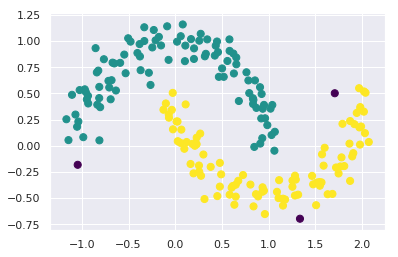

In [6]:
X, y = make_moons(200, noise=.1, random_state=0)

clustering = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

A strong drawback for DBSCAN is its high dependency on its parameters.

## Clusters with varying densities

Now let us generate a dataset with clusters that vary in density. Use the `make_blobs` to generate 300 samples. You should generate 3 clusters with std of 1, 2.5 and 0.5 repectively. Use `random_state=1`

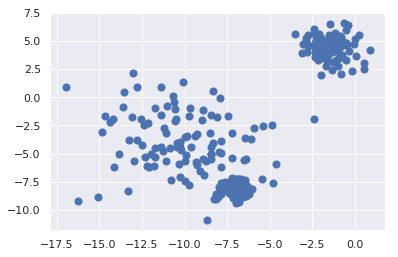

In [7]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=300,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis');

Do you clearly distinguish the 3 clusters? Try with AgglomerativeClustering, which linkage function do you think will work the best?

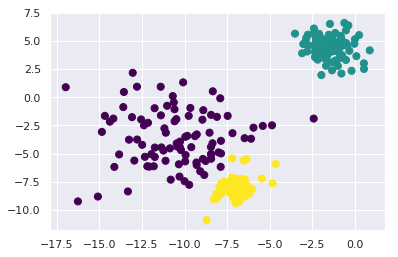

In [8]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Now use DBSCAN, try several values for `eps`. Is there a value that can separate the clusters properly? 

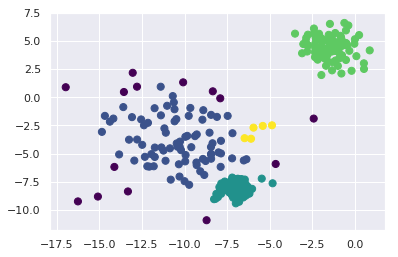

In [9]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.165, min_samples=4).fit(X)
labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');